In [53]:
import numpy as np
import numpy.random as npr
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

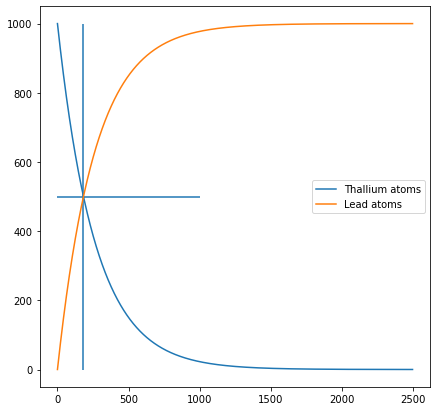

In [54]:
N0_tl = 1000
N0_pb = 0
time_range = 2500
time_steps = np.arange(time_range)
# tau = (3.052 * 60) / np.log(2)
tau = (3.052 * 60)

def prob_dec(t):
    return (1 - 2 ** (-t / tau))

prob_t = prob_dec(time_steps) # probability of decaying at timestep t
prob_notdec = 1-prob_t   
Nt_tl = N0_tl * prob_notdec
Nt_pb = N0_tl - Nt_tl

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(time_steps, Nt_tl, label='Thallium atoms')
ax.plot(time_steps, Nt_pb, label='Lead atoms')
ax.hlines(500,0,1000)
ax.vlines(180,0,1000)
ax.legend()

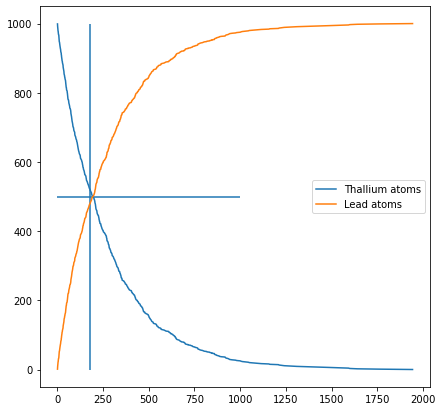

In [55]:
z = np.random.rand(1000)
times_generated = - (tau / np.log(2)) * np.log(1 - z)
# times_generated = - (tau) * np.log(1 - z)

times_dec = np.sort(times_generated)
atom_decrement = np.arange(1,len(times_dec)+1)
Nt_tl = N0_tl - atom_decrement
Nt_pb = N0_tl - Nt_tl

fig, ax = plt.subplots(figsize = (7,7))
ax.plot(times_dec, Nt_tl, label='Thallium atoms')
ax.plot(times_dec, Nt_pb, label='Lead atoms')
ax.hlines(500,0,1000)
ax.vlines(180,0,1000)
ax.legend()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [56]:
Z = 79
e_el = 1.60217663e-19
E = 7.7 * 1e+6 * e_el
sigma = (5.29177210903 / 100) * 1e-11
epsilon_0 = 8.8541878128e-12

cov_mtrx = np.array([[sigma**2,0],[0,sigma**2]])
beam = npr.multivariate_normal([0,0],cov_mtrx,1000000)

The fraction of backscattered particles is 0.163%


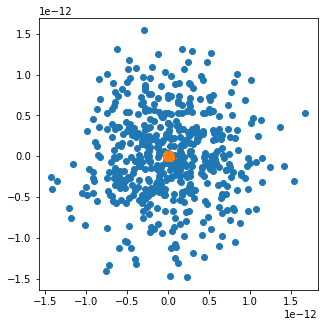

In [57]:
b_bkscat = (Z * e_el ** 2) / (2 * np.pi * epsilon_0 * E)
beam_dist = np.sqrt(beam[:,0] ** 2 + beam[:,1] ** 2)
beam_bkscat = beam[beam_dist < b_bkscat]

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(beam[:500,0], beam[:500,1])
ax.scatter(beam_bkscat[:500,0], beam_bkscat[:500,1])

print(f'The fraction of backscattered particles is {(beam_bkscat.shape[0] / beam.shape[0]) * 100}%')

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

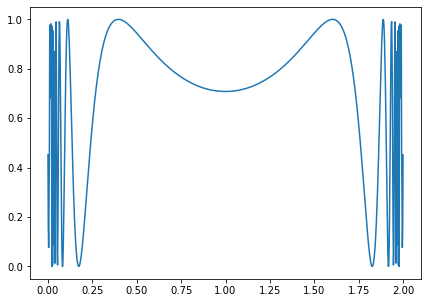

In [58]:
# hit miss method
x = np.linspace(0.001,1.999,1000)
y = np.sin(1 / (x * (2 - x))) ** 2
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x,y)

In [59]:
N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y < np.sin(1 / (x * (2 - x))) ** 2: count+=1
I=2*count/N
print(I)

1.4544


In [60]:
# mean value method
N = 10000
x_i = np.random.uniform(0.001, 1.999, N)
f_sum = np.sum(np.sin(1 / (x_i * (2 - x_i))) ** 2)
I = (2 / N) * f_sum
print(I)

1.4564314209642941


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



3.1432


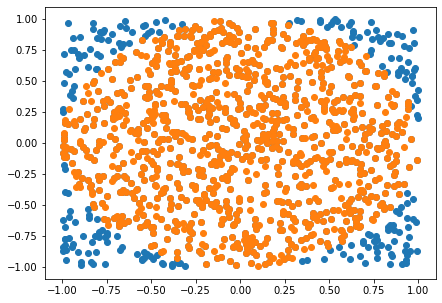

In [61]:
N = 100000
A = 4
sq_points = stats.uniform(loc=-1,scale=2).rvs(size=(N,2))
sq_points_dist = np.sqrt(sq_points[:,0] ** 2 + sq_points[:,1] ** 2)
k = np.sum(sq_points_dist <= 1)
sq_points_hit = sq_points[sq_points_dist <= 1]

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(sq_points[:1000,0], sq_points[:1000,1])
ax.scatter(sq_points_hit[:1000,0], sq_points_hit[:1000,1])

I = (k * A) / N
print(I)

In [62]:
# should be easy

5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [63]:
def is_f(x): # function of which I want to calculate the integral
    return (x ** (-0.5)) / (np.exp(x) + 1)

def if_w(x): # importance function w 
    return 1 / (np.sqrt(x))

def if_w_inv_cdf(x): # inverse "cumulative" function of the importance function w
    return x ** 2 / 4

pinf = float('+inf')
ninf = float('-inf')

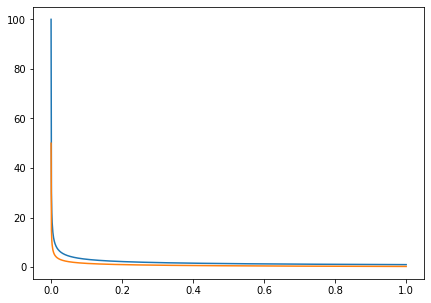

In [64]:

N = 10000
eps = 1e-4
x = np.linspace(0 + eps,1 + eps,1000)
w_x = if_w(x)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x,w_x)
ax.plot(x,is_f(x))

In [65]:
x_i = if_w_inv_cdf(stats.uniform.rvs(loc = 0, scale = 2, size=N))
w_i = if_w(x_i)
f_x_i = is_f(x_i)
f_x_i = f_x_i[w_i != pinf]
w_i = w_i[w_i != pinf]
argsum = np.sum(f_x_i/w_i)

if_w_integral = 2. # the integral of 1 / sqrt(2) from 0 to 1 is 2
I = (1 / N) * argsum * if_w_integral
print(I)

0.8394704118871303
